# EDA

## IMPORTACIÓN DE PAQUETES

In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

%config IPCompleter.greedy = True

## IMPORTAR LOS DATOS

In [17]:
df = pd.read_csv('../../02_Datos/03_Trabajo/trabajo.csv', index_col= 0)
df

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,High
254,0.78,0.61,0.71,0.19,0.60,Middle
255,0.54,0.82,0.71,0.29,0.77,High
256,0.50,0.75,0.81,0.61,0.26,Middle


In [18]:
cat = pd.read_pickle('../../02_Datos/03_Trabajo/cat_resultado_calidad.pickle')
num = pd.read_pickle('../../02_Datos/03_Trabajo/num_resultado_calidad.pickle')

## EDA CATEGÓRICAS

### ANÁLISIS ESTADÍSTICO 

In [19]:
def frecuencias_cat(df_cat):
    resultado = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return(resultado)

frecuencias_cat(cat)

,Variable,Valor,Frecuencia
3,level,very_low,0.093023
2,level,High,0.244186
1,level,Low,0.321705
0,level,Middle,0.341085


### ANÁLISIS GRÁFICO

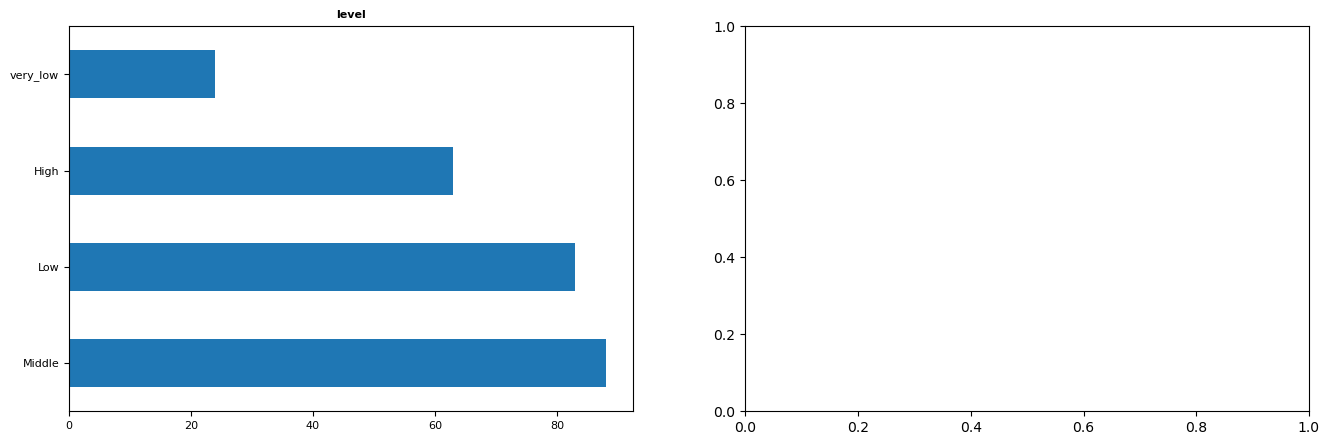

In [20]:
def grafico_eda_categoricas(df_cat):

    #Calculamos el número de filas necesarias
    from math import ceil
    filas = ceil(df_cat.shape[1]/2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows= filas, ncols= 2, figsize = (16,filas*5))
    #Aplanamos el gráfico
    ax = ax.flat

    #creamos el bucle para mostrar el gráfico
    for cada, variable in enumerate(df_cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable,fontsize = 8, fontweight = 'bold')
        ax[cada].tick_params(labelsize=8)

grafico_eda_categoricas(cat)    

## EDA NUMÉRICAS

### ANÁLISIS ESTADÍSTICO

In [21]:
num

,stg,scg,str,lpr,peg
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24
...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58
254,0.78,0.61,0.71,0.19,0.60
255,0.54,0.82,0.71,0.29,0.77
256,0.50,0.75,0.81,0.61,0.26


In [22]:
def estadisticos_cont(cat_num):
    #Calculamos el describe
    resultado = cat_num.describe().T
    #Añadimos la mediana
    resultado['median'] = cat_num.median()
    #Reordenamos para que la mediana esté al lado de la mediana
    resultado = resultado.iloc[:,[0,1,8,2,3,4,5,6,7]]
    return resultado

estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
stg,258.0,0.371147,0.3270,0.210271,0.0,0.24075,0.3270,0.4950,0.99
scg,258.0,0.355674,0.3025,0.211962,0.0,0.21000,0.3025,0.4975,0.90
str,258.0,0.468004,0.4900,0.245940,0.0,0.29125,0.4900,0.6900,0.95
lpr,258.0,0.432713,0.3300,0.248108,0.0,0.25000,0.3300,0.6475,0.99
peg,258.0,0.458539,0.5000,0.255211,0.0,0.25000,0.5000,0.6600,0.93


### ANÁLISIS GRÁFICO

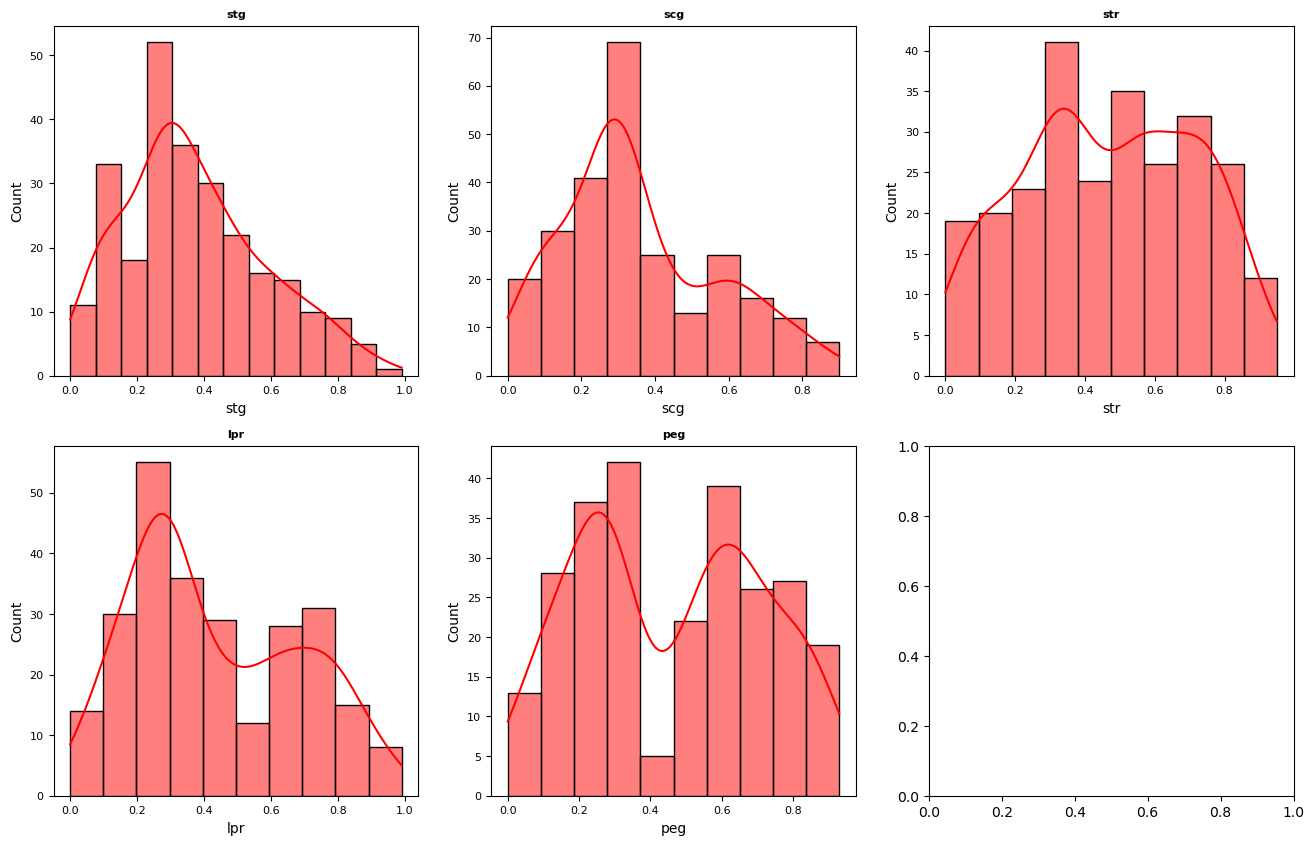

In [23]:
def grafico_eda_numericas(df_cont):
    from math import ceil
    #contamos las filas
    filas = ceil(df.shape[1]/3)
    #Creamos la matriz del gráfico
    f, ax = plt.subplots(nrows= filas, ncols= 3, figsize = (16, filas * 5))
    #aplanamos para iterar sobre el gráfico como si fuera de 1 dimensión
    ax = ax.flat
    #Creamos el bucle que añadimos en cada hueco de la matriz
    for cada, variable in enumerate(df_cont):
        sns.histplot( df_cont[variable], kde= True, ax=ax[cada], color= 'r', alpha=0.5)
        ax[cada].set_title(variable, fontsize = 8, fontweight = 'bold')
        ax[cada].tick_params(labelsize = 8)

grafico_eda_numericas(num)

In [28]:
num.corr()

,stg,scg,str,lpr,peg
stg,1.000000,0.081035,0.040841,0.099543,0.206359
scg,0.081035,1.000000,0.083732,0.097816,0.182792
str,0.040841,0.083732,1.000000,0.036481,0.120779
lpr,0.099543,0.097816,0.036481,1.000000,-0.269574
peg,0.206359,0.182792,0.120779,-0.269574,1.000000


''

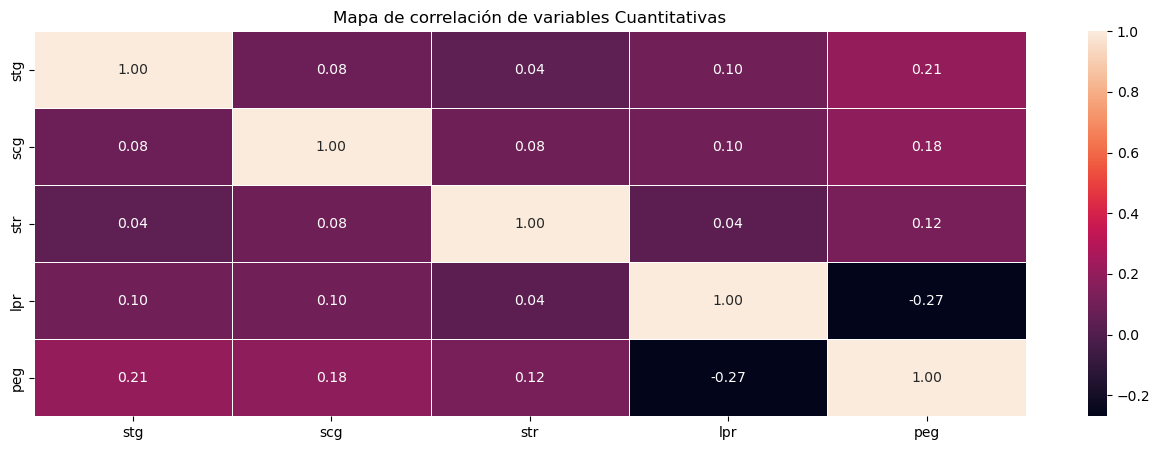

In [26]:
# Heat map

plt.figure(figsize=(16,5))
sns.heatmap(num.corr(), annot = True,  linewidths=.5, fmt= '.2f')
plt.title('Mapa de correlación de variables Cuantitativas')
;

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

In [ ]:
ruta_cat = '../../02_Datos/03_Trabajo/cat_resultado_eda.pickle'
ruta_num  ='../../02_Datos/03_Trabajo/num_resultado_eda.pickle'

#Guardamos los archivos

cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)

In [ ]:
df.columns.to_list()

['STG', 'SCG', 'STR', 'LPR', 'PEG', ' UNS']